In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fpl=pd.read_excel(r'C:\Users\PLAVAK\Desktop\FPL_dataset.xlsx')
fpl.head()

,Player,Team,Points,Cost,Position,Goals_Scored,Assists,Saves,Yellow_Card,Red_Card,Min_Played,TSB,CS,Shots_On_Target,Goals_Conceded,BPS
0,Alisson,Liverpool,89,6.2,GK,0,1,45.0,0,1,1733,9.3,10,0,12,408
1,Ederson,Man City,82,6.0,GK,0,0,50.0,3,1,2171,11.7,9,0,27,406
2,Kepa,Chelsea,69,5.4,GK,0,0,42.0,0,0,2250,4.3,6,0,32,387
3,Schmeichel,Leicester,119,5.4,GK,0,0,81.0,2,0,2610,14.3,10,0,28,552
4,de Gea,Man Utd,103,5.3,GK,0,0,75.0,2,0,2610,11.4,8,0,30,464


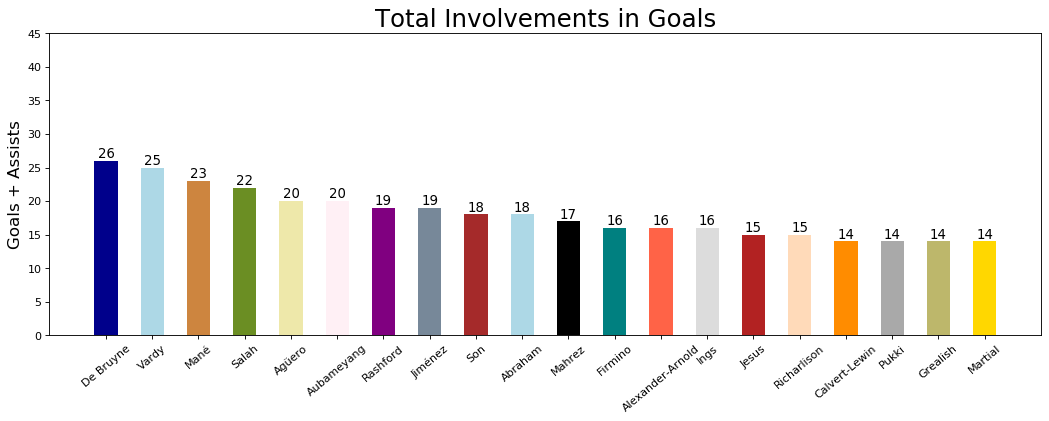

In [2]:
Player=fpl.Player
Goals_Scored_n_Assists=fpl.Goals_Scored+fpl.Assists
df=pd.DataFrame({"Player":Player,"Combined_GA":Goals_Scored_n_Assists})
df=df.sort_values(by='Combined_GA',ascending=False)[:20]
df=df.reset_index(drop=True)
n = df['Player'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,5), dpi= 80)
plt.bar(df['Player'], df['Combined_GA'], color=c, width=.5)
for i, val in enumerate(df['Combined_GA'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(df['Player'], rotation=40, horizontalalignment= 'center')
plt.title("Total Involvements in Goals", fontsize=22)
plt.ylabel('Goals + Assists',fontsize=15)
plt.ylim(0, 45)
plt.show()


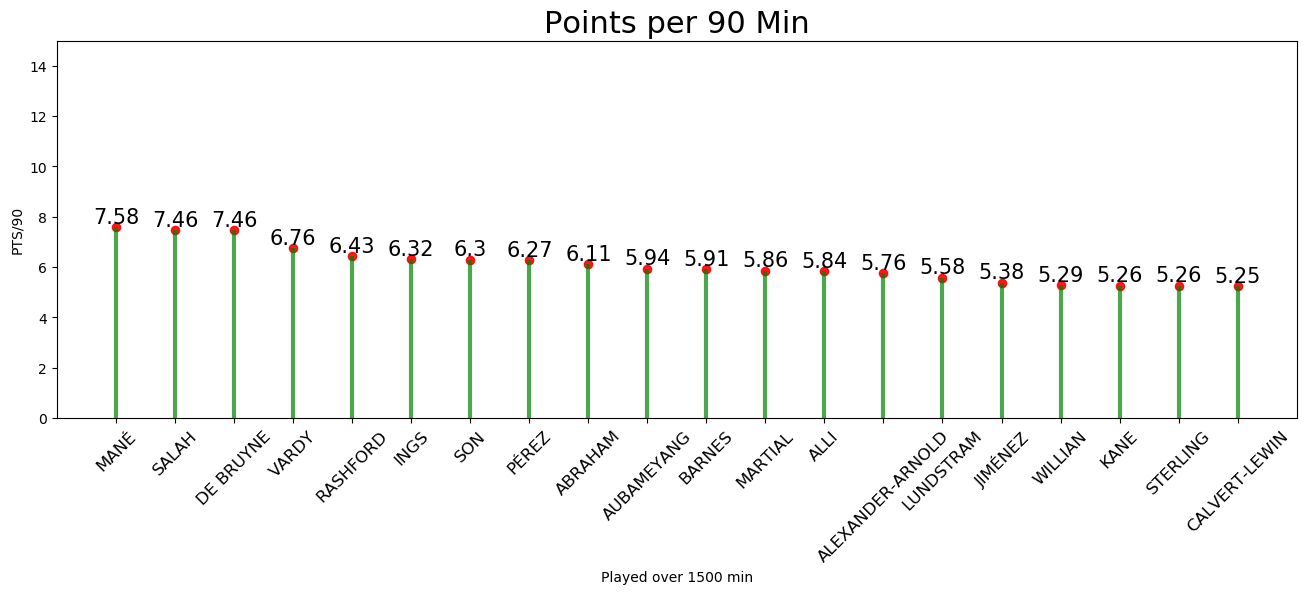

In [3]:
pts_p_min=[]
player=[]
for i in range(len(fpl)):
    if fpl.Min_Played[i]>1500:
        pts_p_min.append((fpl.Points[i]/fpl.Min_Played[i])*90)
        player.append(fpl.Player[i])
df=pd.DataFrame({"Player":player,"pts":pts_p_min}).sort_values(by='pts',ascending=False)[:20]

fig, ax = plt.subplots(figsize=(16,5), dpi= 100)
ax.vlines(x=df.Player, ymin=0, ymax=df.pts, color='green', alpha=0.7, linewidth=3)
ax.scatter(x=df.Player, y=df.pts, s=35, color='red', alpha=0.9)
ax.set_title('Points per 90 Min', fontdict={'size':22})
ax.set_ylabel('PTS/90')
ax.set_xlabel('Played over 1500 min')
ax.set_xticks(df.Player)
ax.set_xticklabels(df.Player.str.upper(), rotation=45, fontdict={'horizontalalignment': 'center', 'size':12})
ax.set_ylim(0, 15)

for row in df.itertuples():
    ax.text(row.Player, row.pts, s=round(row.pts, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=15)

plt.show()

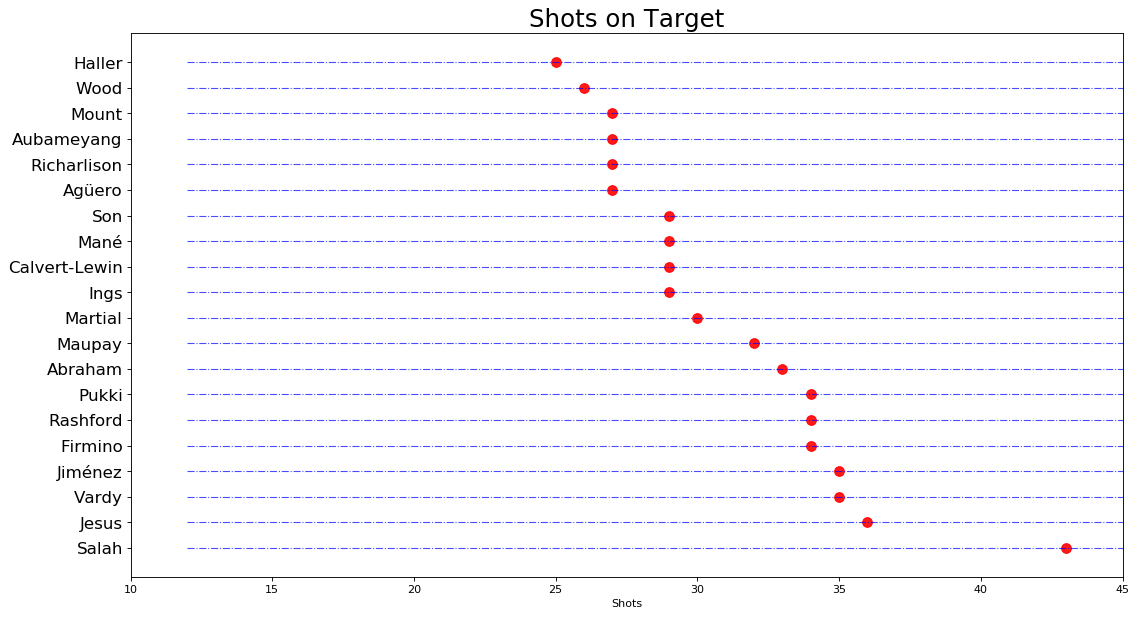

In [4]:
sot=fpl.Shots_On_Target
df=pd.DataFrame({"Player":Player,"sot":sot}).sort_values(by='sot',ascending=False)[:20]
fig, ax = plt.subplots(figsize=(16,9), dpi= 80)
ax.hlines(y=df.Player, xmin=12, xmax=45, color='blue', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.Player, x=df.sot, s=75, color='red', alpha=0.9)
ax.set_title('Shots on Target', fontdict={'size':22})
ax.set_xlabel('Shots')
ax.set_yticks(df.Player)
ax.set_yticklabels(df.Player.str.title(), fontdict={'horizontalalignment': 'right'},fontsize=15)
ax.set_xlim(10, 45)
plt.show()

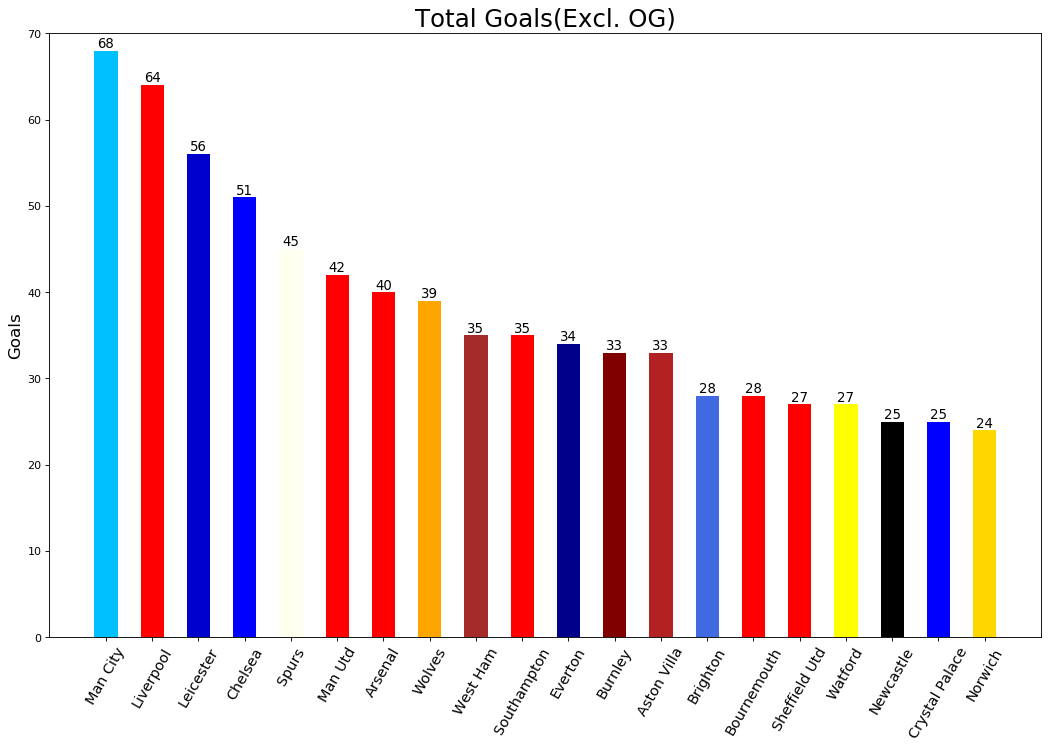

In [5]:
team=fpl.Team.unique()
scored={}
for i in team:
    count=0
    for j in range(len(fpl)):
        if i==fpl.Team[j]:
            count+=fpl.Goals_Scored[j]
    scored[i]=count
df = pd.DataFrame(list(scored.items()),columns = ['Team','Goals_Scored']).sort_values(by='Goals_Scored',ascending=False)
plt.figure(figsize=(16,10), dpi= 80)
team_a=pd.DataFrame({"Team":df.Team})
colors=['deepskyblue','red','mediumblue','blue','ivory','red','red','orange','brown','red','darkblue','maroon','firebrick','royalblue','red','red','yellow','black','blue','gold']
plt.bar(df['Team'], df['Goals_Scored'], color=colors, width=0.5)
for i, val in enumerate(df['Goals_Scored'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['Team'], rotation=60, horizontalalignment= 'center',color='black',fontsize=13)
plt.title("Total Goals(Excl. OG)", fontsize=22)
plt.ylabel('Goals',fontsize=15)
plt.ylim(0, 70)
plt.show()

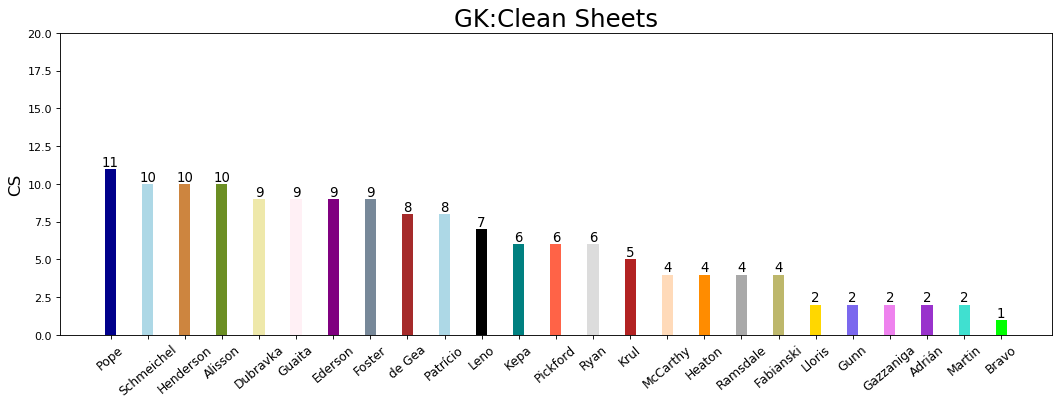

In [6]:
gk=[]
cs=[]
for i in range(len(fpl)):
    if fpl.Position[i]=="GK" and fpl.CS[i]!=0:
        gk.append(fpl.Player[i])
        cs.append(fpl.CS[i])
df=pd.DataFrame({"Goalkeeper":gk,"Clean_Sheets":cs}).sort_values(by="Clean_Sheets",ascending=False)
n = df['Goalkeeper'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,5), dpi= 80)
plt.bar(df['Goalkeeper'], df['Clean_Sheets'], color=c, width=.3)
for i, val in enumerate(df['Clean_Sheets'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(df['Goalkeeper'], rotation=40, horizontalalignment= 'center',fontsize=11)
plt.title("GK:Clean Sheets", fontsize=22)
plt.ylabel('CS',fontsize=15)
plt.ylim(0, 20)
plt.show()


Text(0, 0.5, '')

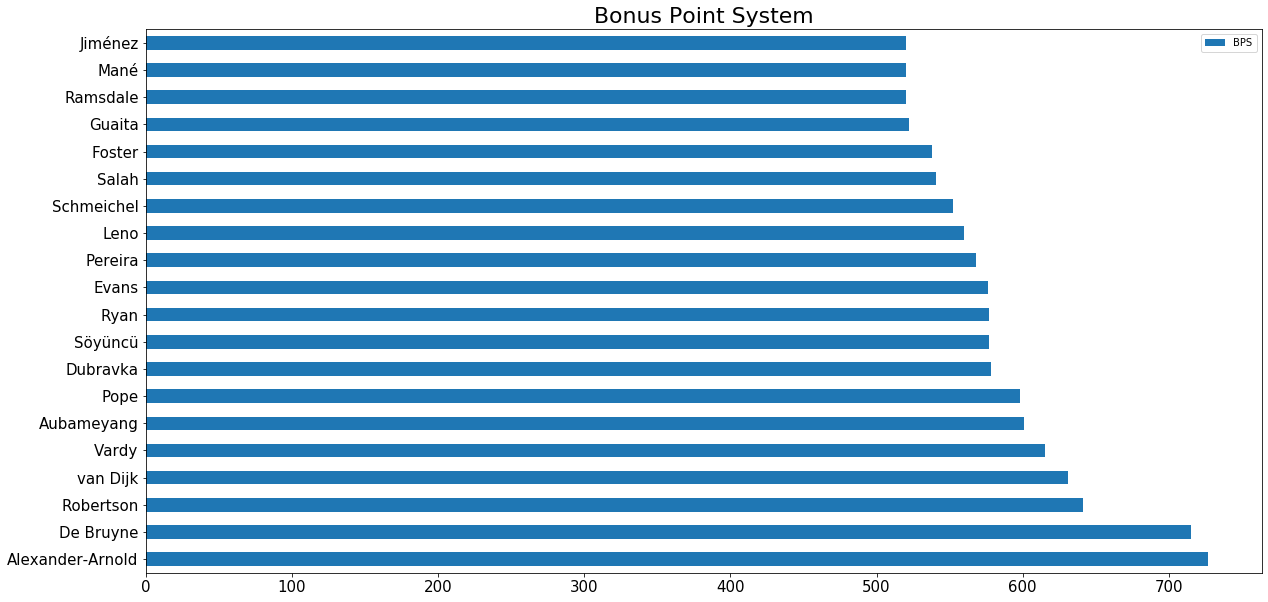

In [7]:
bps=fpl.BPS
df=pd.DataFrame({"Player":Player,"BPS":bps}).sort_values(by="BPS",ascending=False)[:20]
ax = df.plot.barh(x="Player", y='BPS',figsize=(20,10),fontsize=15)
ax.set_title('Bonus Point System', fontdict={'size':22})
ax.set_ylabel('')

Text(0, 0.5, 'Points')

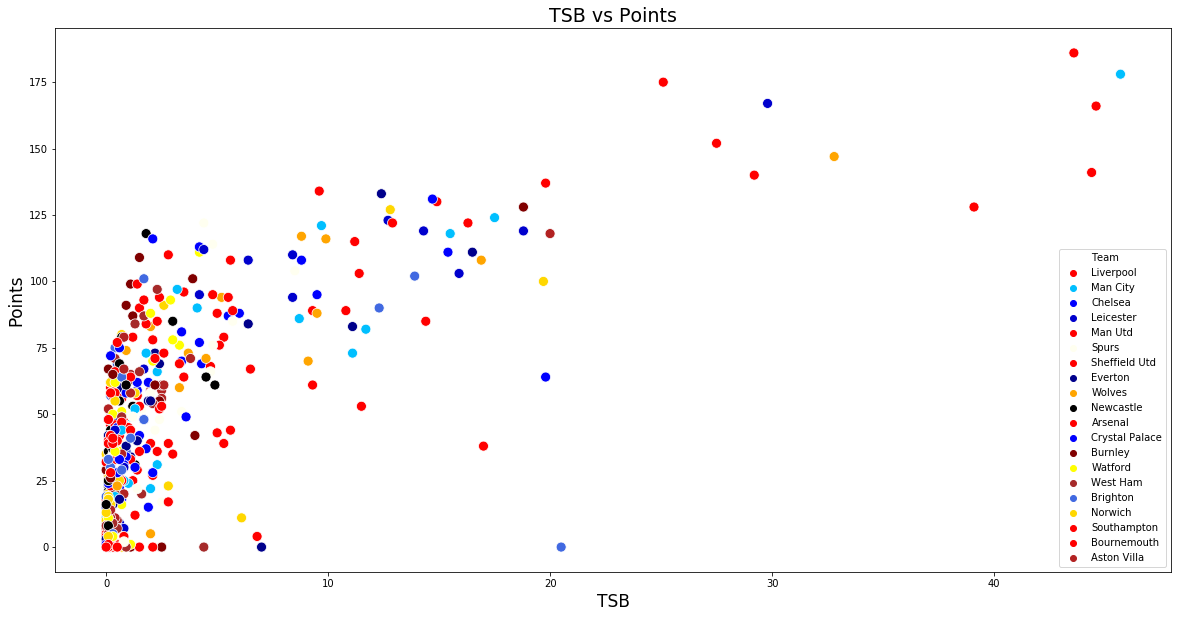

In [58]:
x=fpl.Points
y=fpl.TSB
color=colors=['red','deepskyblue','blue','mediumblue','red','ivory','red','darkblue','orange','black','red','blue','maroon','yellow','brown','royalblue','gold','red','red','firebrick']
teams=[]
for i in team_a.Team:
    teams.append(i)
df=pd.DataFrame({"Team":teams,"colors":color})
plt.figure(figsize=(20,10))
sns.scatterplot(x=fpl['TSB'],y=fpl['Points'],hue=fpl['Team'],palette=df.colors,s=100)
plt.title("TSB vs Points",fontsize=19)
plt.xlabel("TSB",fontsize=17)

plt.ylabel("Points",fontsize=17)

(0, 60)

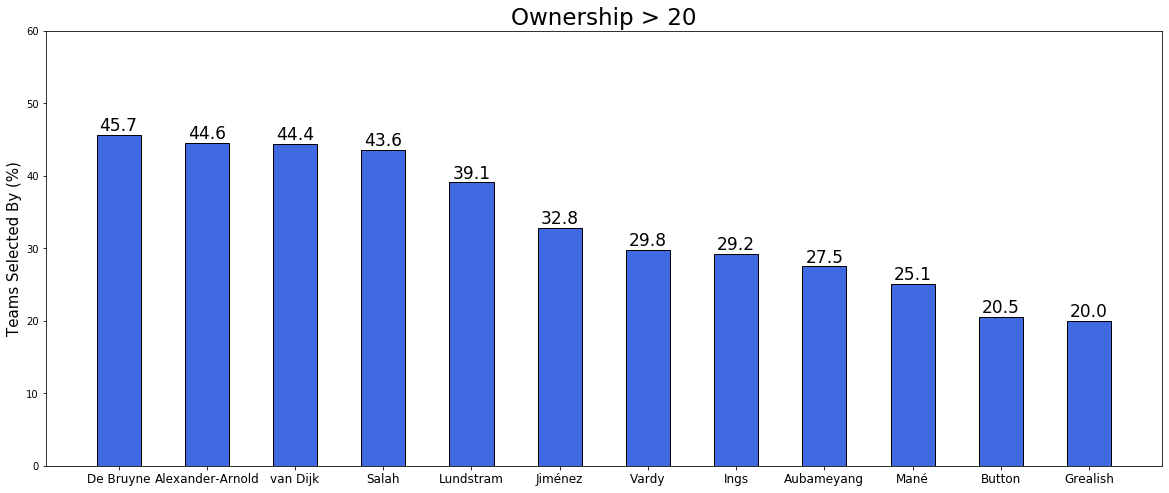

In [9]:
tsb_20=[]
pl=[]
for i in range(len(fpl)):
    if fpl.TSB[i]>=20:
        pl.append(fpl.Player[i])
        tsb_20.append(fpl.TSB[i])
mn=pd.DataFrame({"Player":pl,"TSB_20":tsb_20}).sort_values(by="TSB_20",ascending=False)
plt.figure(figsize=(20,8))

plt.bar(mn.Player,mn.TSB_20,color='blue',width=0.5,tick_label=mn.Player,capstyle="projecting",ec='black',fc='royalblue')
plt.title("Ownership > 20",fontsize=23)

for i, val in enumerate(mn['TSB_20'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':17})
plt.ylabel("Teams Selected By (%)",fontsize=15)

plt.gca().set_xticklabels(mn['Player'], rotation=0, horizontalalignment= 'center',fontsize=12)
plt.ylim(0,60)

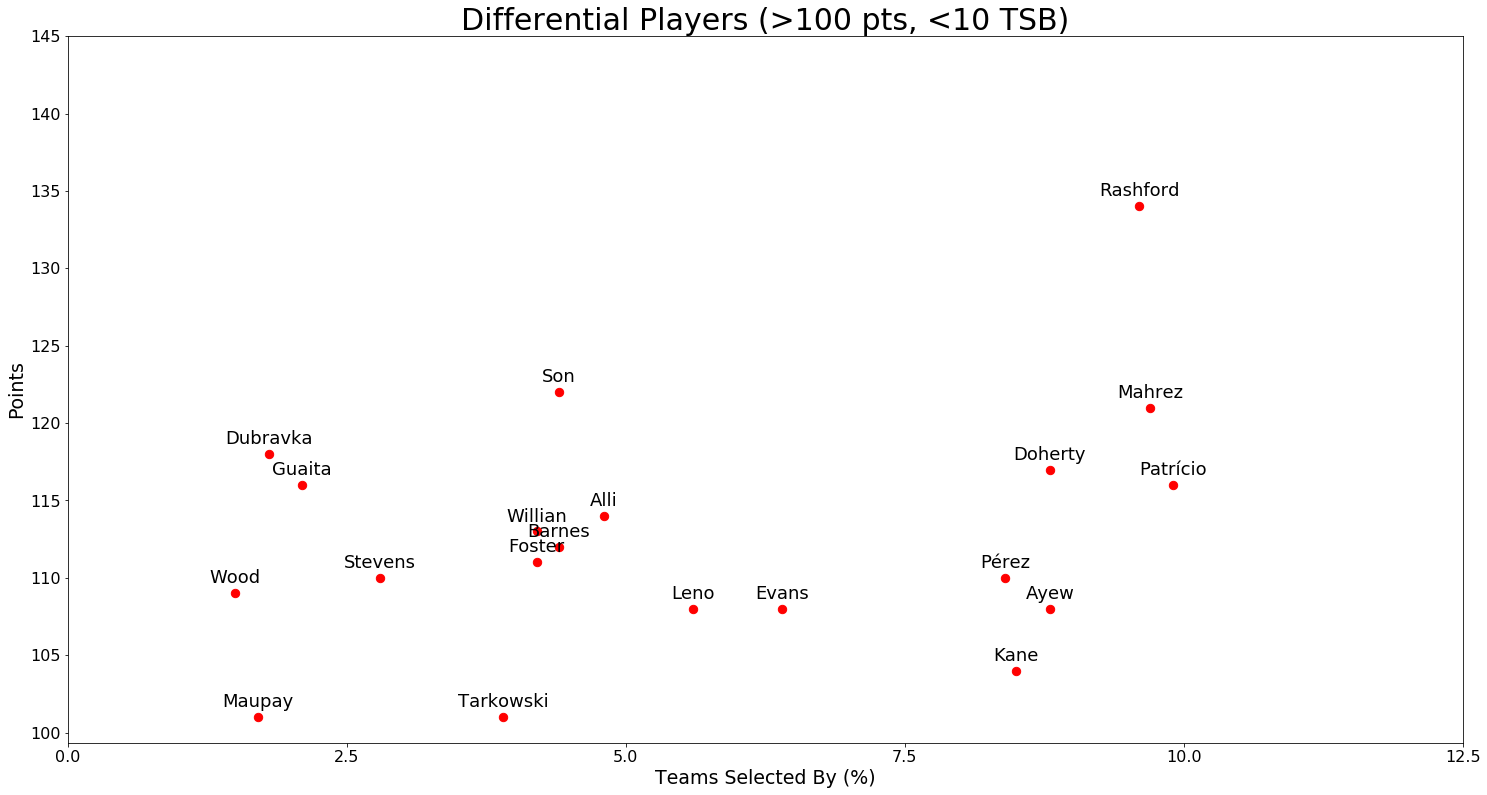

In [10]:
diff=[]
ts=[]
pts=[]

for i in range(len(fpl)):
    if (fpl.TSB[i]<10 and fpl.Points[i]>=100):
        diff.append(fpl.Player[i])
        ts.append(fpl.TSB[i])
        pts.append(fpl.Points[i])
        
        
df=pd.DataFrame({"Player":diff,"TSB":ts,"Points":pts})
plt.figure(figsize=(25,13))
plt.scatter(df.TSB,df.Points,s=70,color='red')


for x,y,z in zip(df.TSB,df.Points,df.Player):

    label = "{prov}".format(prov=z)

    
    plt.annotate(label,
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center',fontsize=18) 

plt.xticks(np.arange(0,15,2.5),fontsize=16)
plt.yticks(np.arange(100,150,5),fontsize=16)
plt.xlabel("Teams Selected By (%)",fontsize=19)
plt.ylabel("Points",fontsize=19)
plt.title("Differential Players (>100 pts, <10 TSB)",fontsize=30)
plt.show()

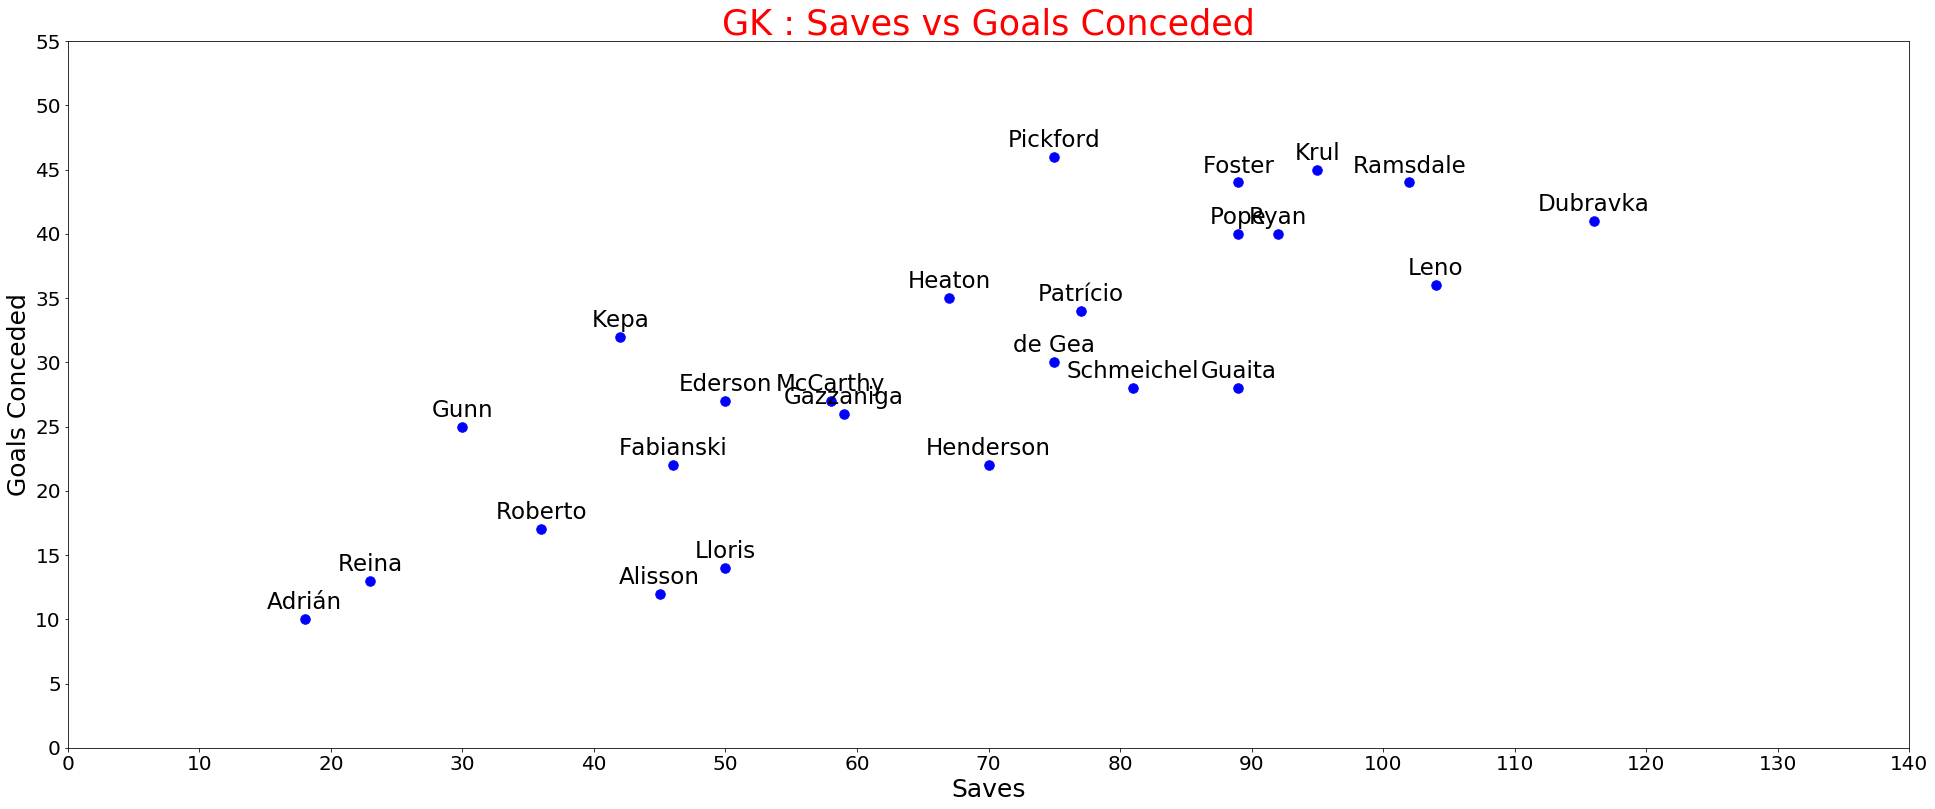

In [11]:
gc=[]
s=[]
pl=[]
mint=[]
for i in range(len(fpl)):
    if (fpl.Position[i]=="GK" and fpl.Min_Played[i]>500):
        gc.append(fpl.Goals_Conceded[i])
        s.append(fpl.Saves[i])
        pl.append(fpl.Player[i])
        mint.append((fpl.Saves[i]/fpl.Min_Played[i])*90)
df=pd.DataFrame({"Player":pl,"Goals_Conceded":gc,"Saves":s,"Saves_per_90":mint})     
plt.figure(figsize=(33,13))
plt.scatter(df.Saves,df.Goals_Conceded,s=90,color='blue')

for x,y,z in zip(df.Saves,df.Goals_Conceded,df.Player):

    label = "{prov}".format(prov=z)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset pixels", 
                 xytext=(0,10),
                 ha='center',fontsize=23) 

plt.xticks(np.arange(0,150,10),fontsize=20)
plt.yticks(np.arange(0,60,5),fontsize=20)
plt.xlabel("Saves",fontsize=25)
plt.ylabel("Goals Conceded",fontsize=25)
plt.title("GK : Saves vs Goals Conceded",fontsize=35,color='red')
plt.show()

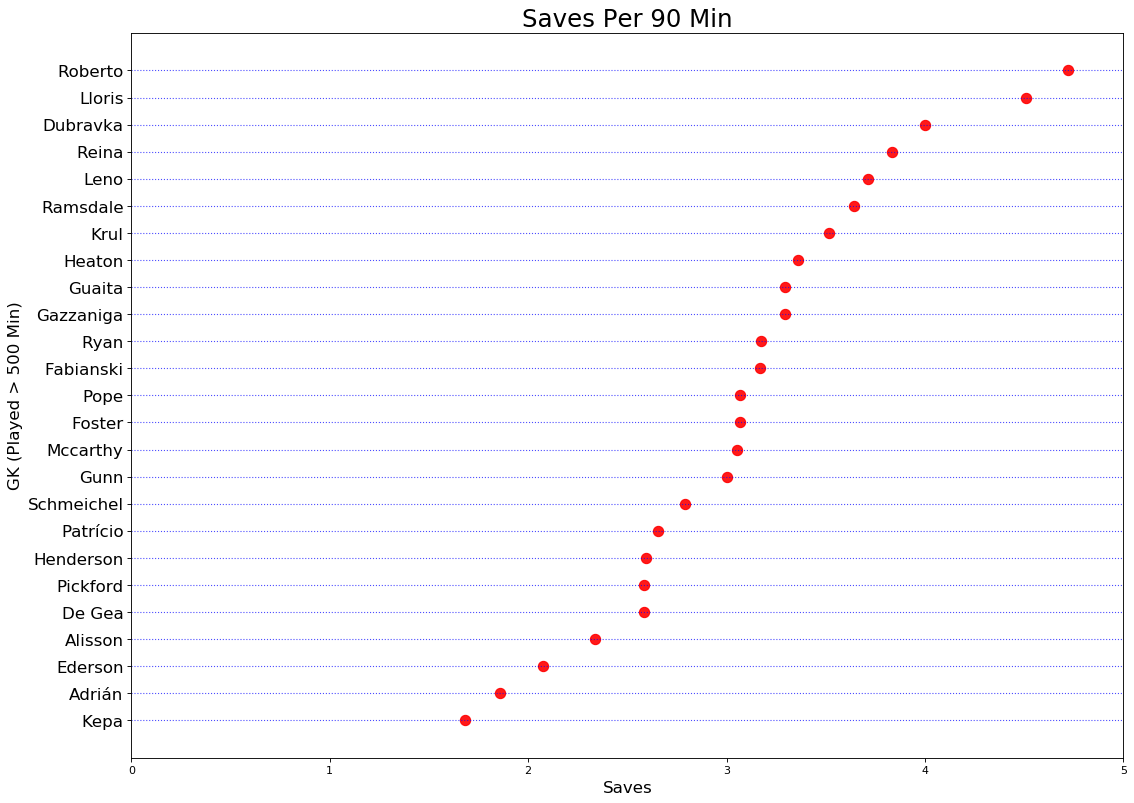

In [12]:
df=pd.DataFrame({"Player":pl,"S_per_90":mint}).sort_values(by="S_per_90")
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
ax.hlines(y=df.Player, xmin=0, xmax=5, color='blue', alpha=0.7, linewidth=1, linestyles='dotted')
ax.scatter(y=df.Player, x=df.S_per_90, s=85, color='red', alpha=0.9)
ax.set_title('Saves Per 90 Min', fontdict={'size':22})
ax.set_xlabel('Saves',fontsize=15)
ax.set_yticks(df.Player)
ax.set_yticklabels(df.Player.str.title(), fontdict={'horizontalalignment': 'right'},fontsize=15)
ax.set_xlim(0, 5)
ax.set_ylabel("GK (Played > 500 Min)",fontsize=15)
plt.show()

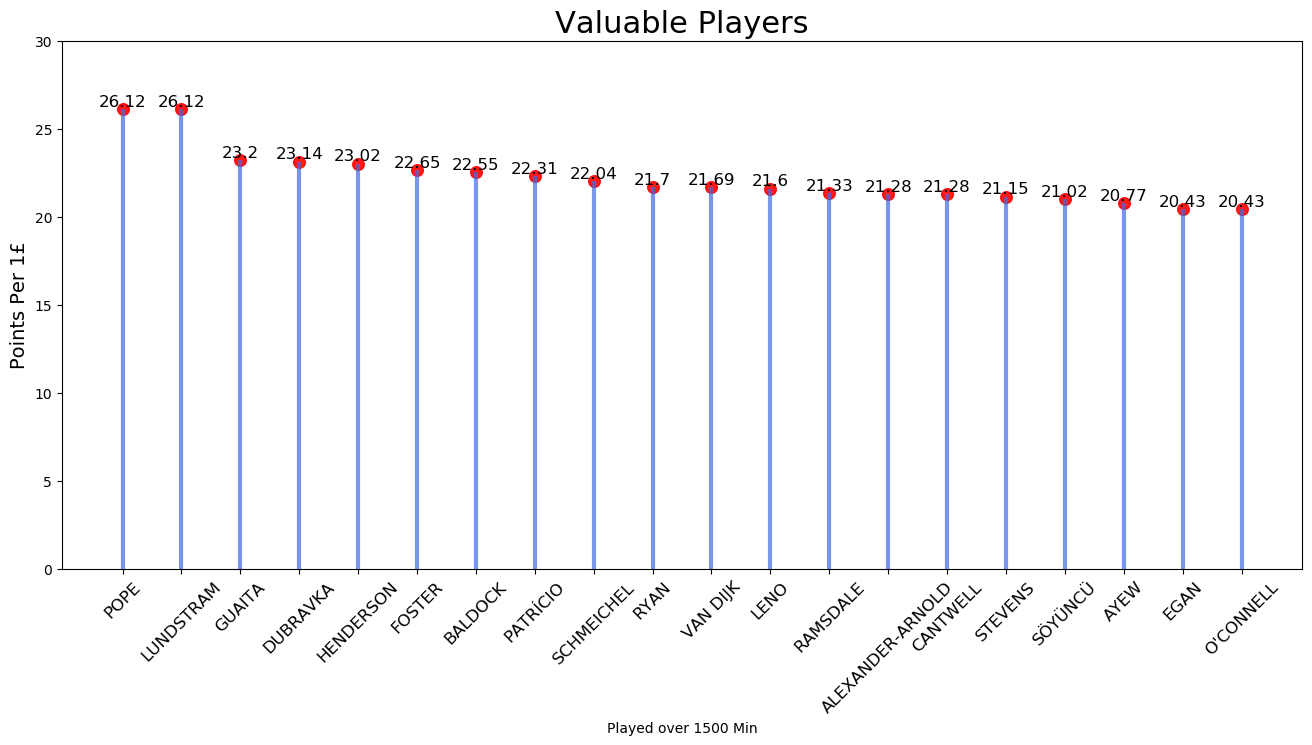

In [13]:
pts_p_cost=[]
play=[]
for i in range(len(fpl)):
    if fpl.Min_Played[i]>1500:
        pts_p_cost.append((fpl.Points[i]/fpl.Cost[i]))
        play.append(fpl.Player[i])
df=pd.DataFrame({"Player":play,"pts_p_cost":pts_p_cost}).sort_values(by='pts_p_cost',ascending=False)[:20]

fig, ax = plt.subplots(figsize=(16,7), dpi= 100)
ax.vlines(x=df.Player, ymin=0, ymax=df.pts_p_cost, color='royalblue', alpha=0.7, linewidth=3)
ax.scatter(x=df.Player, y=df.pts_p_cost, s=70, color='red', alpha=0.9)
ax.set_title('Valuable Players', fontdict={'size':22})
ax.set_ylabel('Points Per 1£',fontsize=14)
ax.set_xlabel('Played over 1500 Min')
ax.set_xticks(df.Player)
ax.set_xticklabels(df.Player.str.upper(), rotation=45, fontdict={'horizontalalignment': 'center', 'size':12})
ax.set_ylim(0, 30)

for row in df.itertuples():
    ax.text(row.Player, row.pts_p_cost, s=round(row.pts_p_cost, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.show()


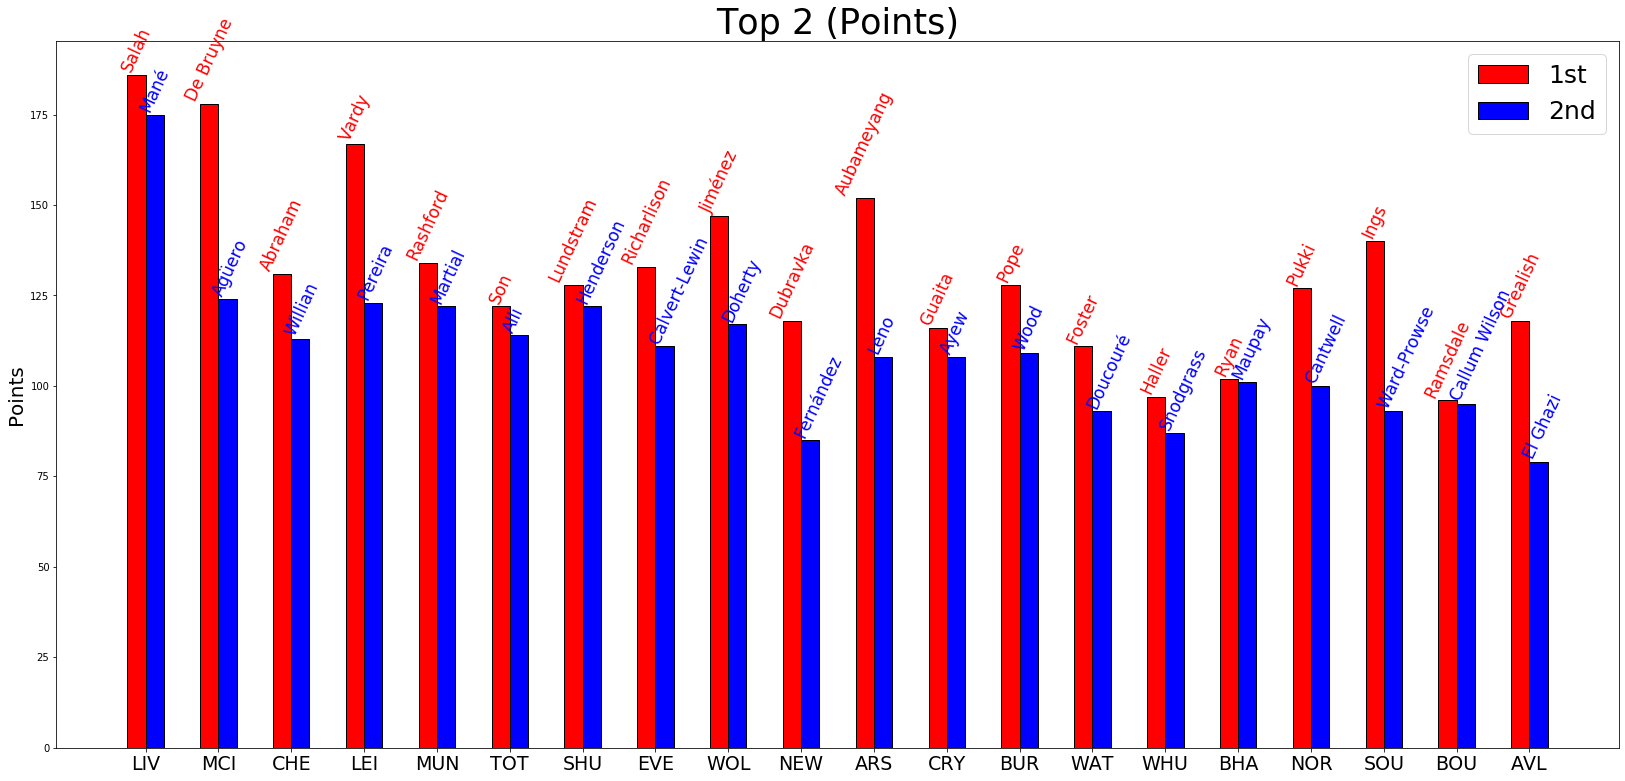

In [14]:
team=fpl['Team'].unique()
first=[]
score=[]
second=[]
score_2=[]
for i in team:
    max=0
    player=""
    max_2=0
    player_2=""
    pos=0
    for k in range(len(fpl)):
        if (fpl.Team[k]==i and fpl.Points[k]>max):
            max=fpl.Points[k]
            pos=k
            player=fpl.Player[k]
    first.append(player)       
    score.append(max)
    
    for j in range(len(fpl)):
        if (fpl.Team[j]==i and fpl.Points[j]>max_2 and fpl.Points[j]!=fpl.Points[pos]):
            max_2=fpl.Points[j]
            player_2=fpl.Player[j]
                    
    second.append(player_2)       
    score_2.append(max_2)
    
df_first=pd.DataFrame({"First":first,"score":score})
df_second=pd.DataFrame({"Second":second,"score_2":score_2})

barWidth=0.25

bars1=[]
bars2=[]

for i in df_first.score: 
    bars1.append(i)
for i in df_second.score_2: 
    bars2.append(i)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(28,13))

plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='black', label='1st')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='black', label='2nd')

for i in range(len(df_first['First'])):
    plt.text(i,df_first.score[i],str(df_first.First[i]), horizontalalignment='center',rotation=65, verticalalignment='bottom', fontdict={'fontweight':500, 'size':13,'fontsize':17,'color':'red'})
 


for i in range(len(df_second['Second'])):
    plt.text(i,df_second.score_2[i],str(df_second.Second[i]), horizontalalignment='left',rotation=65, verticalalignment='bottom', fontdict={'fontweight':500, 'size':13,'fontsize':17,'color':'blue'})


plt.xticks([r + 0.125 for r in range(len(bars1))], ['LIV', 'MCI', 'CHE', 'LEI', 'MUN',
       'TOT', 'SHU', 'EVE', 'WOL', 'NEW',
       'ARS', 'CRY', 'BUR', 'WAT', 'WHU',
       'BHA', 'NOR', 'SOU', 'BOU', 'AVL'],fontsize=19)
 
plt.ylabel("Points",fontsize=20)
plt.legend(fontsize=25)
plt.title("Top 2 (Points)",fontsize=35)
plt.show()

(0, 80)

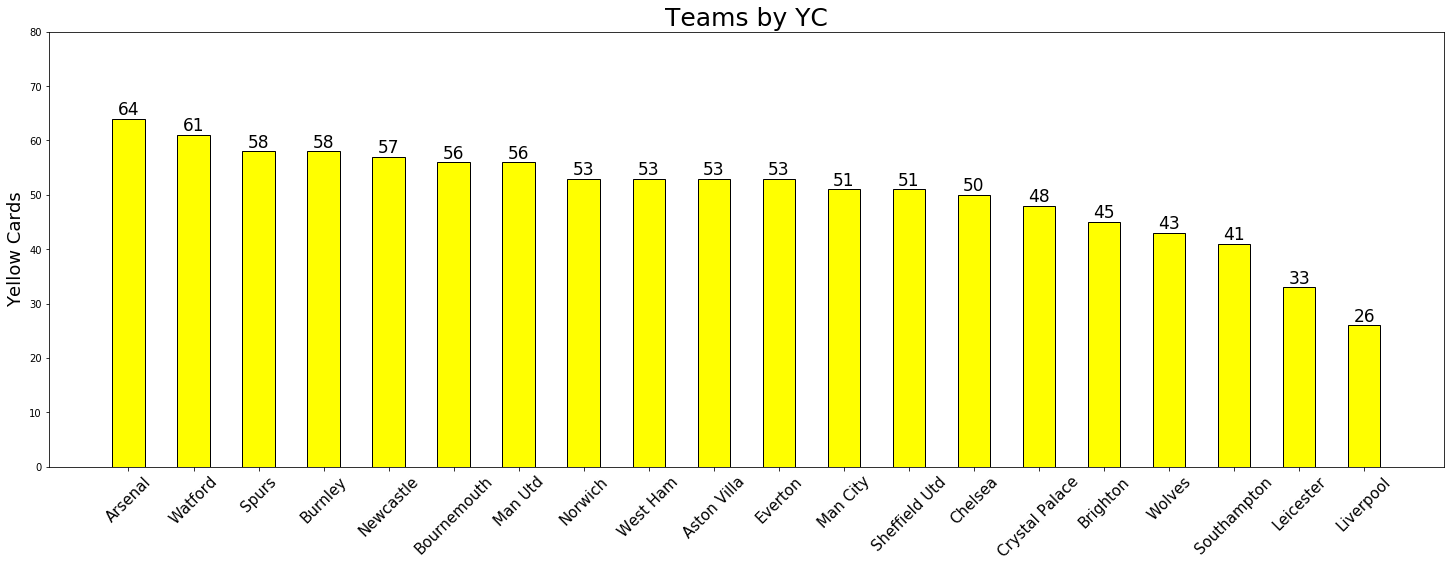

In [15]:
team=fpl.Team.unique()
yellow=[]
for i in team:
    sum=0
    for j in range(len(fpl)):
        if fpl.Team[j]==i:
            sum+=fpl.Yellow_Card[j]
    yellow.append(sum)       
df=pd.DataFrame({"Team":team,"Yellow_Card":yellow}).sort_values(by="Yellow_Card", ascending=False)     
plt.figure(figsize=(25,8))

plt.bar(df.Team,df.Yellow_Card,color='blue',width=0.5,tick_label=df.Team,capstyle="projecting",ec='black',fc='yellow')
plt.title("Teams by YC",fontsize=25)

for i, val in enumerate(df['Yellow_Card'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':17})
plt.ylabel("Yellow Cards",fontsize=18)

plt.gca().set_xticklabels(df['Team'], rotation=45, horizontalalignment= 'center',fontsize=15)
plt.ylim(0,80)

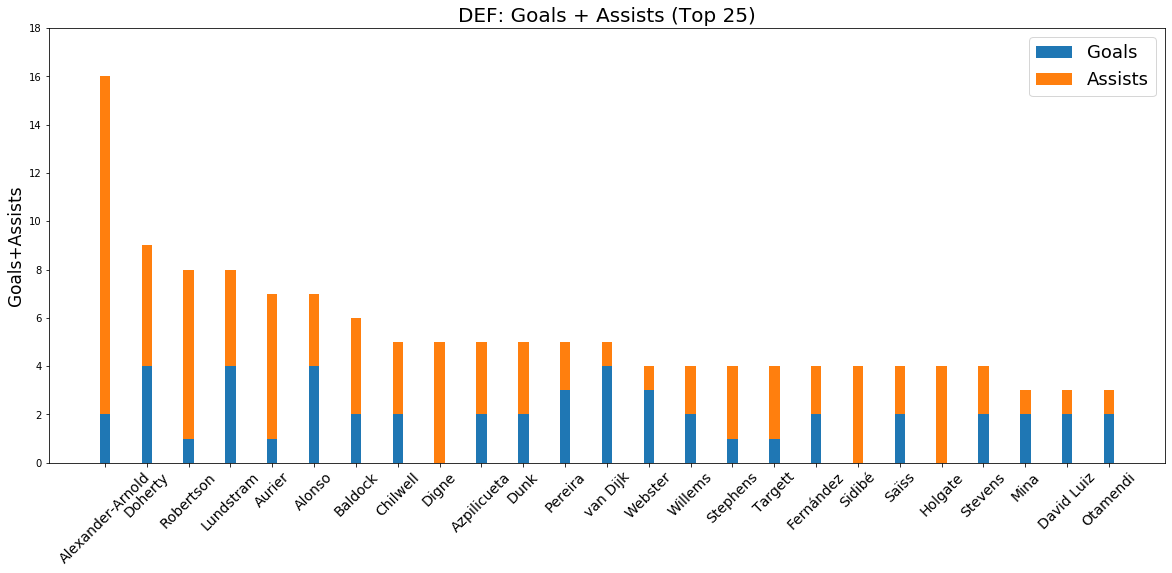

In [43]:
a=[]
g=[]
p=[]
g_a=[]
for i in range(len(fpl)):
    if fpl.Position[i]=="DEF":
        a.append(fpl.Assists[i])
        g.append(fpl.Goals_Scored[i])
        p.append(fpl.Player[i])
        g_a.append(fpl.Assists[i]+fpl.Goals_Scored[i])
df=pd.DataFrame({"Player":p,"Goals":g,"Assists":a,"Goals_P_Assists":g_a}).sort_values(by="Goals_P_Assists",ascending=False)[:25]
df


N = 25


ind = np.arange(N)    
width = 0.25       
plt.figure(figsize=(20,8))
p1 = plt.bar(ind, df.Goals, width)
p2 = plt.bar(ind, df.Assists, width,
             bottom=df.Goals)

plt.ylabel('Goals+Assists',fontsize=17)
plt.title('DEF: Goals + Assists (Top 25)',fontsize=20)
plt.xticks(ind, df.Player,rotation=45,fontsize=14)
plt.yticks(np.arange(0, 20, 2))
plt.legend((p1[0], p2[0]), ('Goals', 'Assists'),fontsize=18)

plt.show()


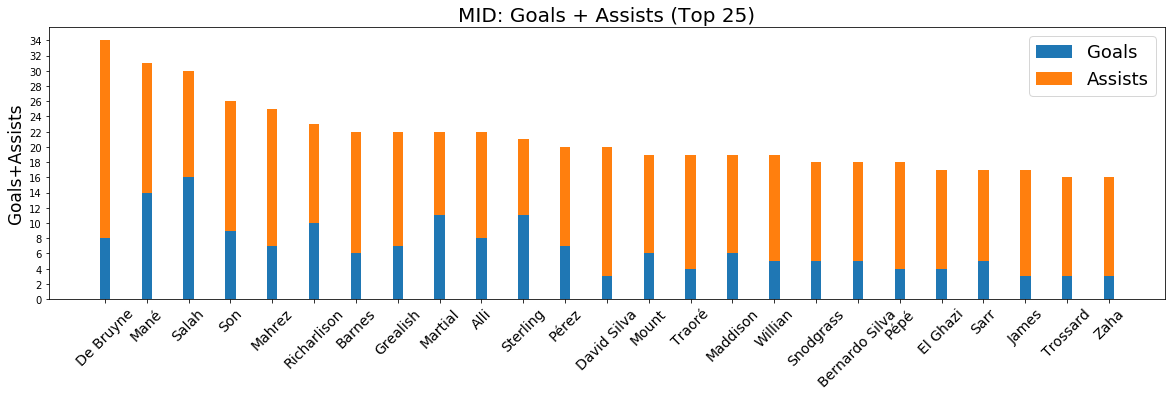

In [47]:
a=[]
g=[]
p=[]
g_a=[]
for i in range(len(fpl)):
    if fpl.Position[i]=="MID":
        a.append(fpl.Assists[i])
        g.append(fpl.Goals_Scored[i])
        p.append(fpl.Player[i])
        g_a.append(fpl.Assists[i]+fpl.Goals_Scored[i])
df=pd.DataFrame({"Player":p,"Goals":g,"Assists":a,"Goals_P_Assists":g_a}).sort_values(by="Goals_P_Assists",ascending=False)[:25]
df


N = 25

ind = np.arange(N)    
width = 0.25       
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, df.Goals, width)
p2 = plt.bar(ind, df.Assists, width,
             bottom=df.Goals)

plt.ylabel('Goals+Assists',fontsize=17)
plt.title('MID: Goals + Assists (Top 25)',fontsize=20)
plt.xticks(ind, df.Player,rotation=45,fontsize=14)
plt.yticks(np.arange(0, 36, 2))
plt.legend((p1[0], p2[0]), ('Goals', 'Assists'),fontsize=18)

plt.show()

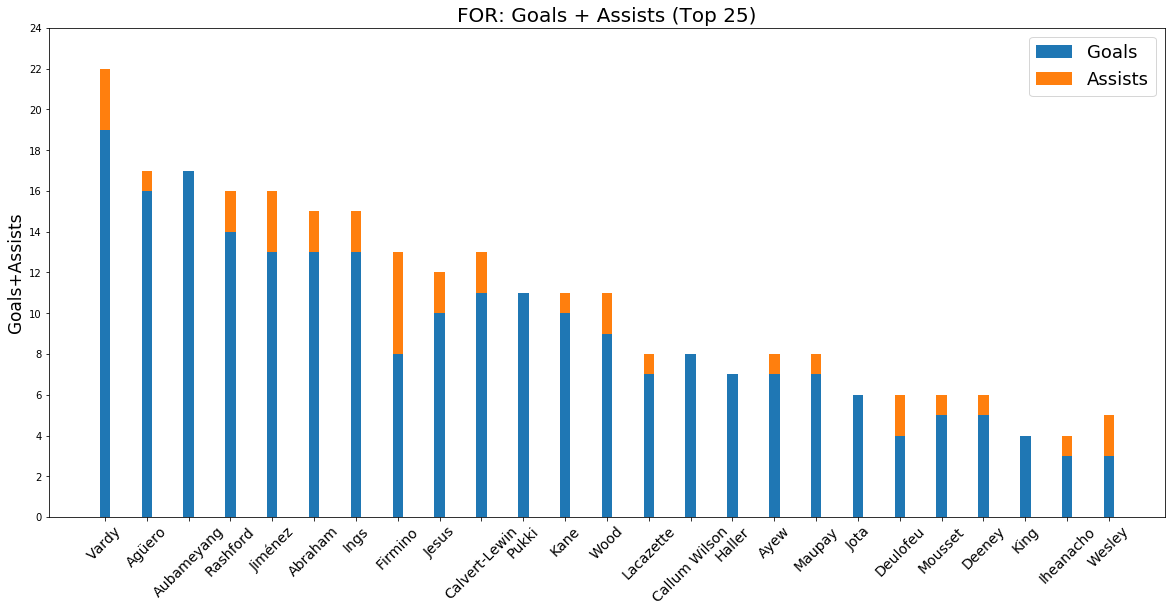

In [50]:
a=[]
g=[]
p=[]
g_a=[]
for i in range(len(fpl)):
    if fpl.Position[i]=="FOR":
        a.append(fpl.Assists[i])
        g.append(fpl.Goals_Scored[i])
        p.append(fpl.Player[i])
        g_a.append(fpl.Assists[i]+fpl.Goals_Scored[i])
df=pd.DataFrame({"Player":p,"Goals":g,"Assists":a,"Goals_P_Assists":g_a}).sort_values(by="Goals_P_Assists",ascending=False)[:25]
df


N = 25

ind = np.arange(N)    
width = 0.25       
plt.figure(figsize=(20,9))
p1 = plt.bar(ind, df.Goals, width)
p2 = plt.bar(ind, df.Assists, width,
             bottom=df.Goals)

plt.ylabel('Goals+Assists',fontsize=17)
plt.title('FOR: Goals + Assists (Top 25)',fontsize=20)
plt.xticks(ind, df.Player,rotation=45,fontsize=14)
plt.yticks(np.arange(0, 26, 2))
plt.legend((p1[0], p2[0]), ('Goals', 'Assists'),fontsize=18)

plt.show()

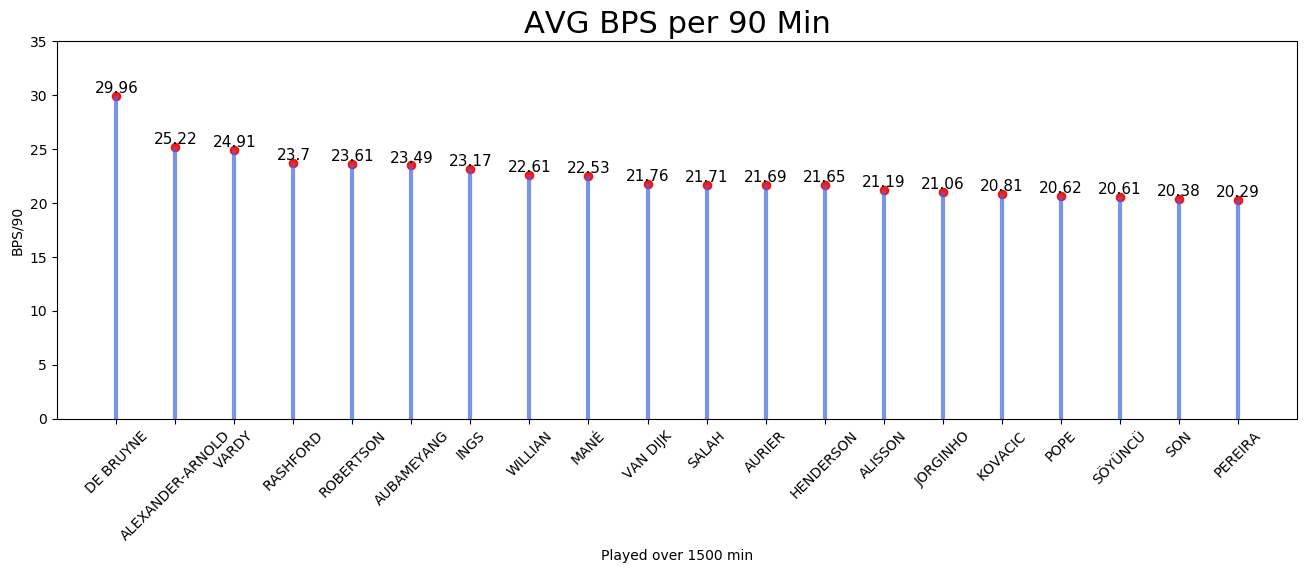

In [57]:
bps_p_min=[]
player=[]
for i in range(len(fpl)):
    if fpl.Min_Played[i]>1500:
        bps_p_min.append((fpl.BPS[i]/fpl.Min_Played[i])*90)
        player.append(fpl.Player[i])
df=pd.DataFrame({"Player":player,"bps":bps_p_min}).sort_values(by='bps',ascending=False)[:20]

fig, ax = plt.subplots(figsize=(16,5), dpi= 100)
ax.vlines(x=df.Player, ymin=0, ymax=df.bps, color='royalblue', alpha=0.7, linewidth=3)
ax.scatter(x=df.Player, y=df.bps, s=35, color='red', alpha=0.9)
ax.set_title('AVG BPS per 90 Min', fontdict={'size':22})
ax.set_ylabel('BPS/90')
ax.set_xlabel('Played over 1500 min')
ax.set_xticks(df.Player)
ax.set_xticklabels(df.Player.str.upper(), rotation=45, fontdict={'horizontalalignment': 'center', 'size':10})
ax.set_ylim(0, 35)

for row in df.itertuples():
    ax.text(row.Player, row.bps, s=round(row.bps, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=11)

plt.show()